# Insurance Price Prediction

### Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


C:\Users\Seth Dwumah\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# load the dataset 
insurance_df = pd.read_csv('insurance.csv')

In [3]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_df.shape

(1338, 7)

In [5]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

The bmi in the dataset 'means body mass index'. BMI is a value derived from individual's weight and height. It is used an indicator of individuals health status

In [6]:
# check missing values
insurance_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
# check duplicates
insurance_df.duplicated().sum()

1

In [12]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Data Analysis

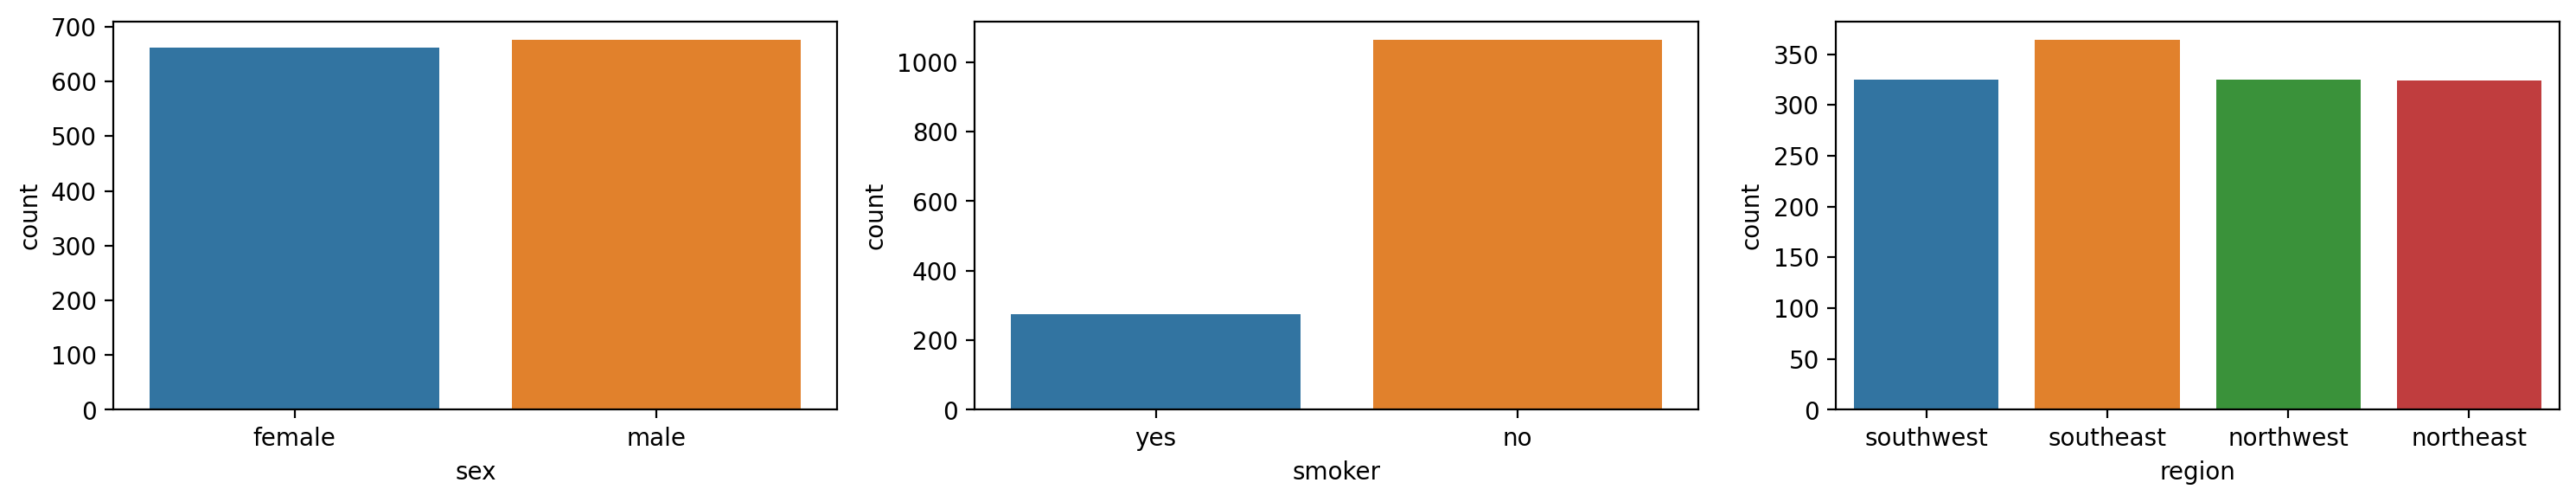

In [21]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize']=(15,3)
fig,axe = plt.subplots(1,3)
sns.countplot(insurance_df['sex'],ax=axe[0])
sns.countplot(insurance_df['smoker'],ax=axe[1])
sns.countplot(insurance_df['region'],ax=axe[2])
plt.tight_layout()

In [27]:
insurance_df['charges'].groupby(insurance_df['sex']).sum()

sex
female    8.321061e+06
male      9.434764e+06
Name: charges, dtype: float64

In [37]:
print(insurance_df['charges'].groupby(insurance_df['region']).sum())
print(insurance_df['charges'].groupby(insurance_df['region']).mean())

region
northeast    4.343669e+06
northwest    4.035712e+06
southeast    5.363690e+06
southwest    4.012755e+06
Name: charges, dtype: float64
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


In [32]:
insurance_df['charges'].groupby(insurance_df['smoker']).mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [41]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

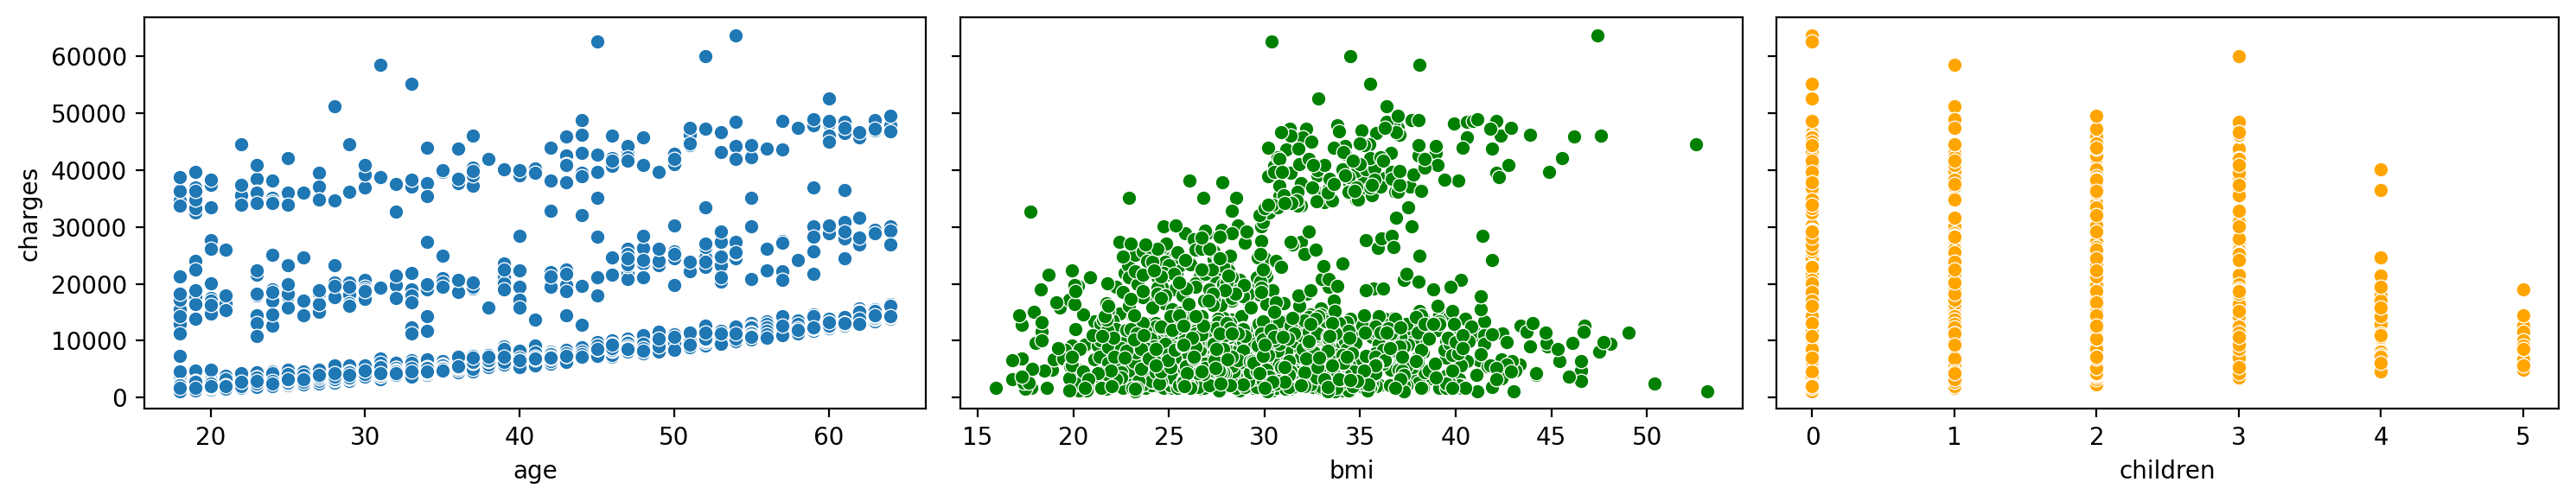

In [43]:
# visualize the continuous data
fig,axe = plt.subplots(1,3, sharey=True)
sns.scatterplot(insurance_df['age'], insurance_df['charges'],ax =axe[0])
sns.scatterplot(insurance_df['bmi'], insurance_df['charges'],ax =axe[1],color='green')
sns.scatterplot(insurance_df['children'], insurance_df['charges'],ax =axe[2],color ='orange')
plt.tight_layout()
plt.show()

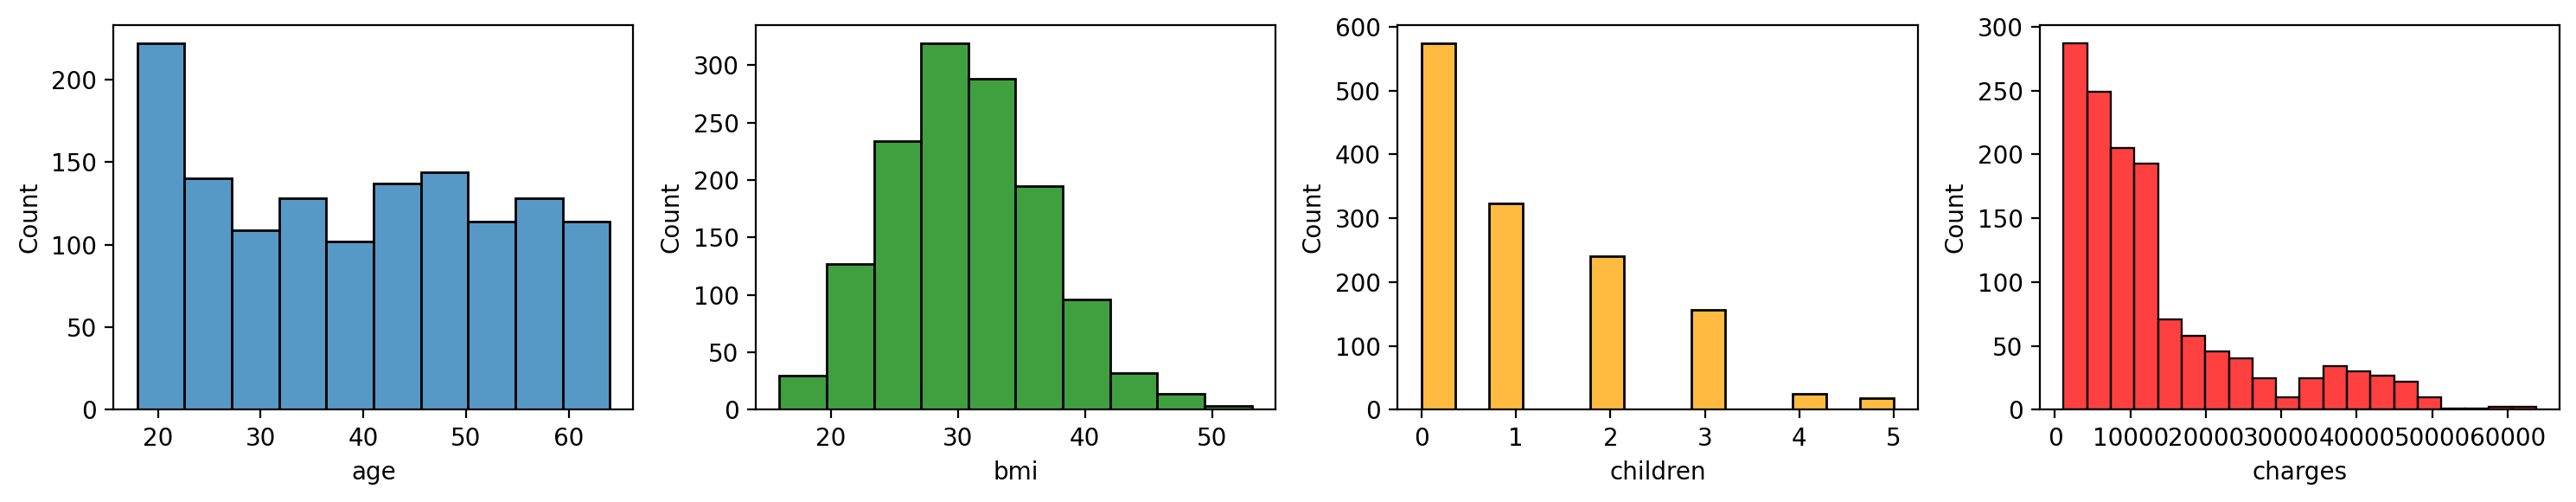

In [57]:
# visualize the continuous data
fig,axe = plt.subplots(1,4)
sns.histplot(insurance_df['age'],bins=10,ax =axe[0])
sns.histplot(insurance_df['bmi'],bins=10,ax =axe[1],color='green')
sns.histplot(insurance_df['children'],ax =axe[2],color ='orange')
sns.histplot(insurance_df['charges'],bins=20,ax =axe[3],color ='red')
plt.tight_layout()
plt.show()

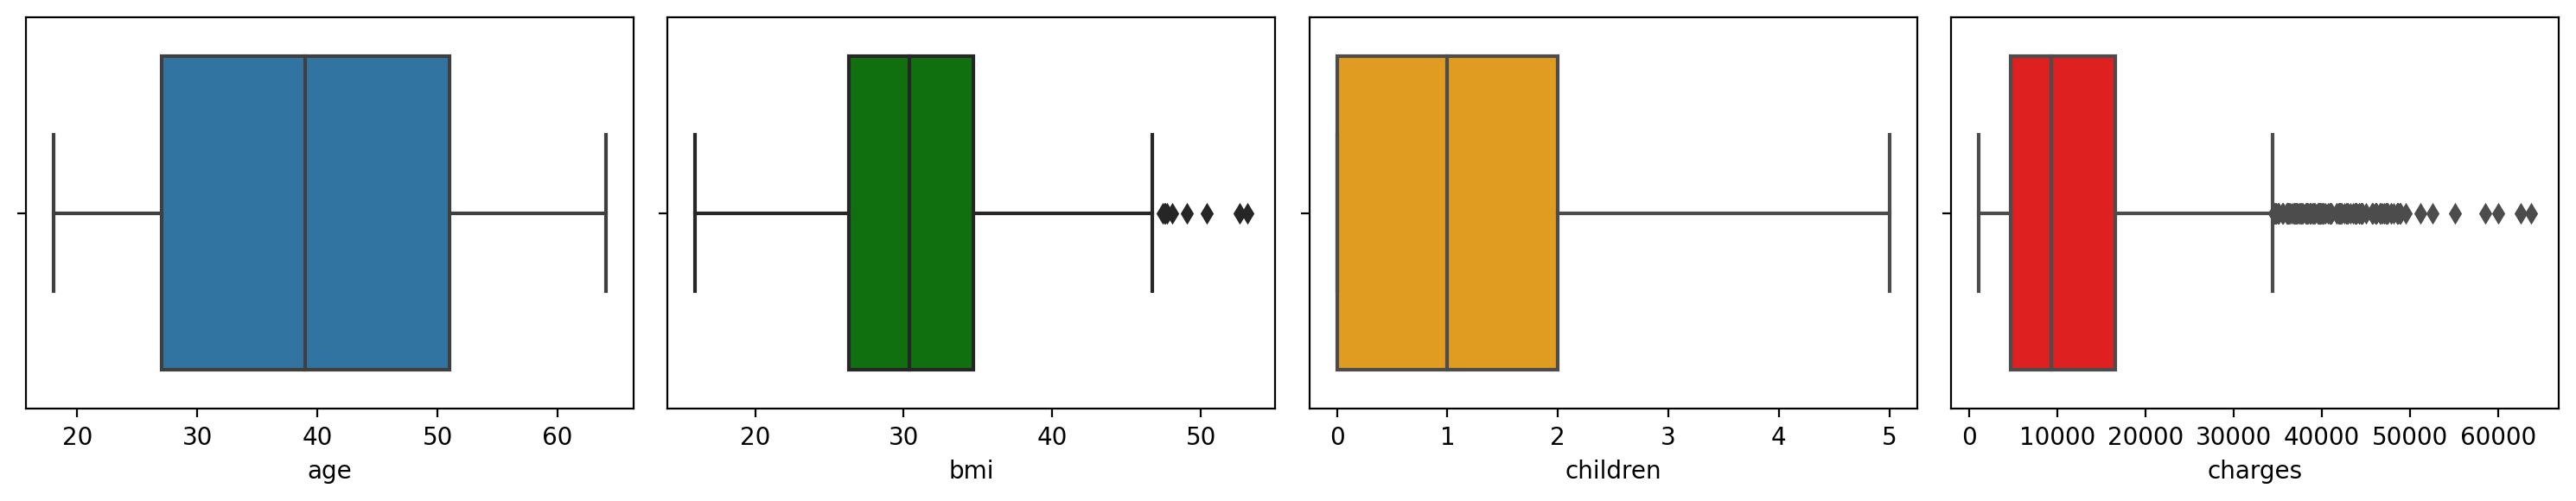

In [51]:
# visualize the continuous data
fig,axe = plt.subplots(1,4, sharey=True)
sns.boxplot(insurance_df['age'],ax =axe[0])
sns.boxplot(insurance_df['bmi'],ax =axe[1],color='green')
sns.boxplot(insurance_df['children'],ax =axe[2],color ='orange')
sns.boxplot(insurance_df['charges'],ax =axe[3],color ='red')
plt.tight_layout()
plt.show()

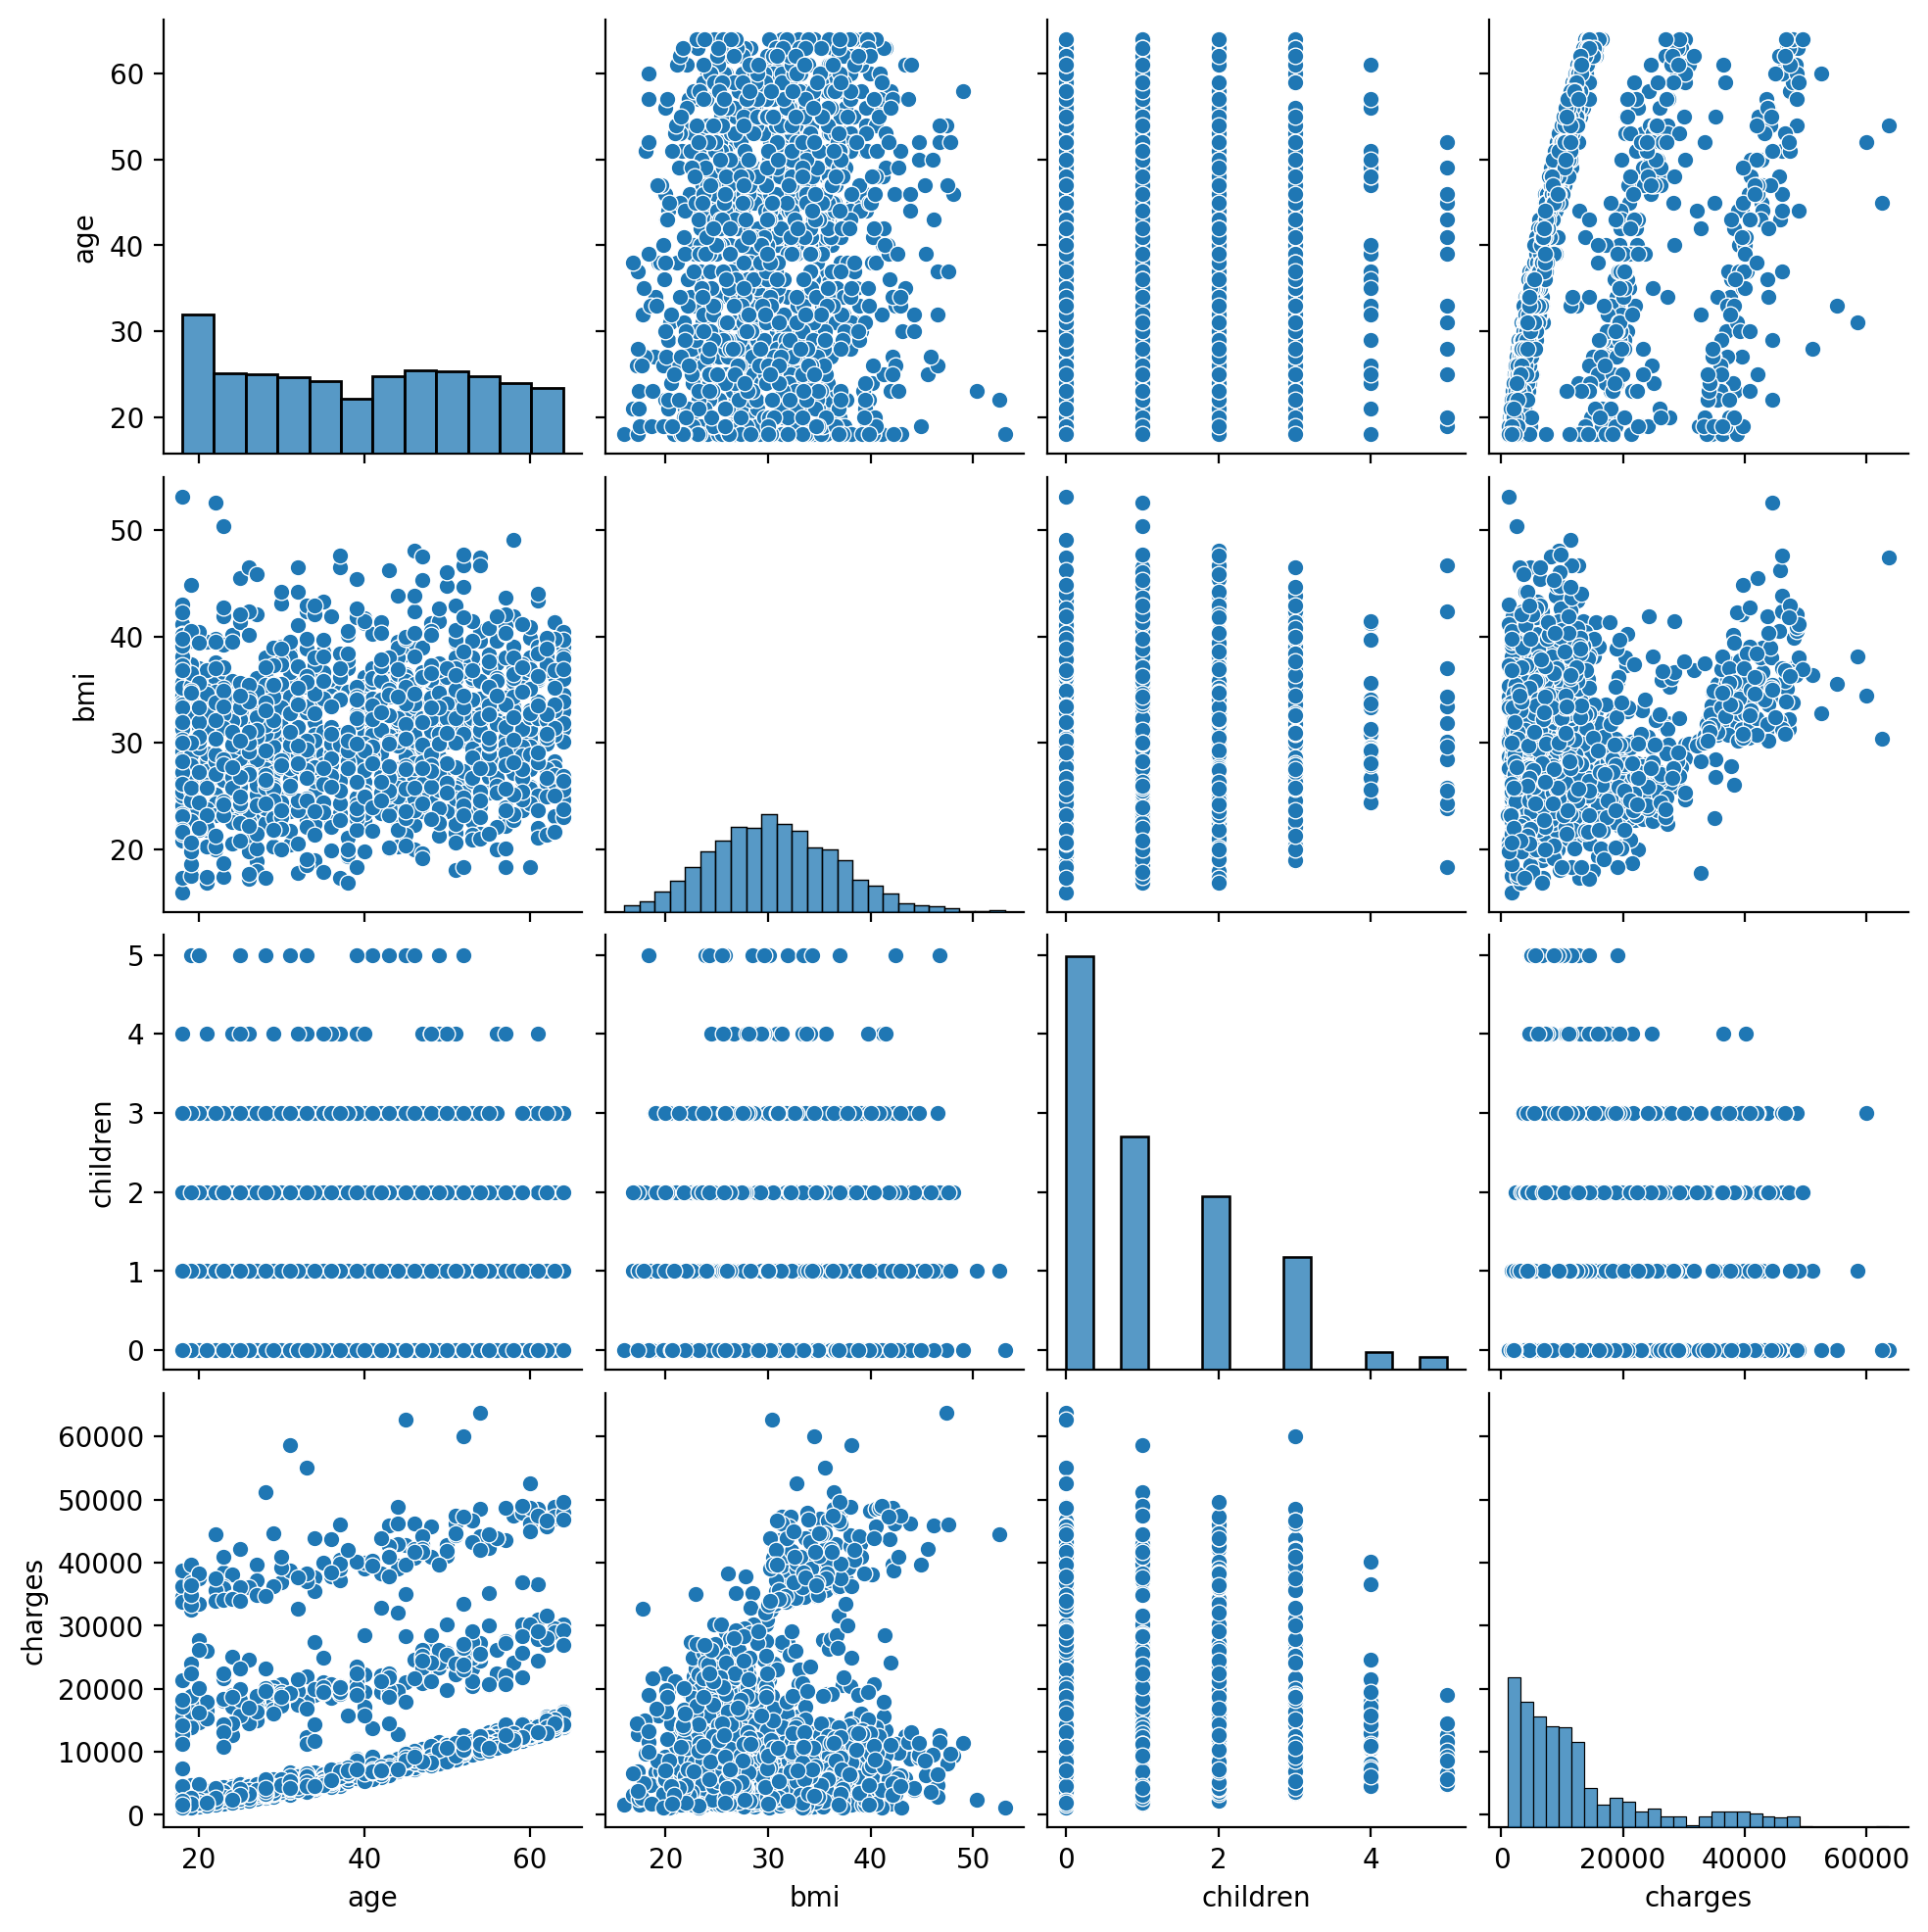

In [49]:
sns.pairplot(insurance_df)

There are some outliers in the data, so we have to remove them

In [59]:
# outlier function
def remove_outlier(data):
    for col in data.columns:
        if data[col].dtypes in ['int64','float64']:
            
            Q1 = np.percentile(data[col],25)
            Q3 = np.percentile(data[col],75)
            IQR = Q3-Q1
            lower_bound = Q1-1.5*IQR
            upper_bound=Q3 +1.5*IQR
            data = data[(data[col]>=lower_bound)& (data[col]<=upper_bound)]
    return data

In [60]:
insurance_df = remove_outlier(insurance_df)

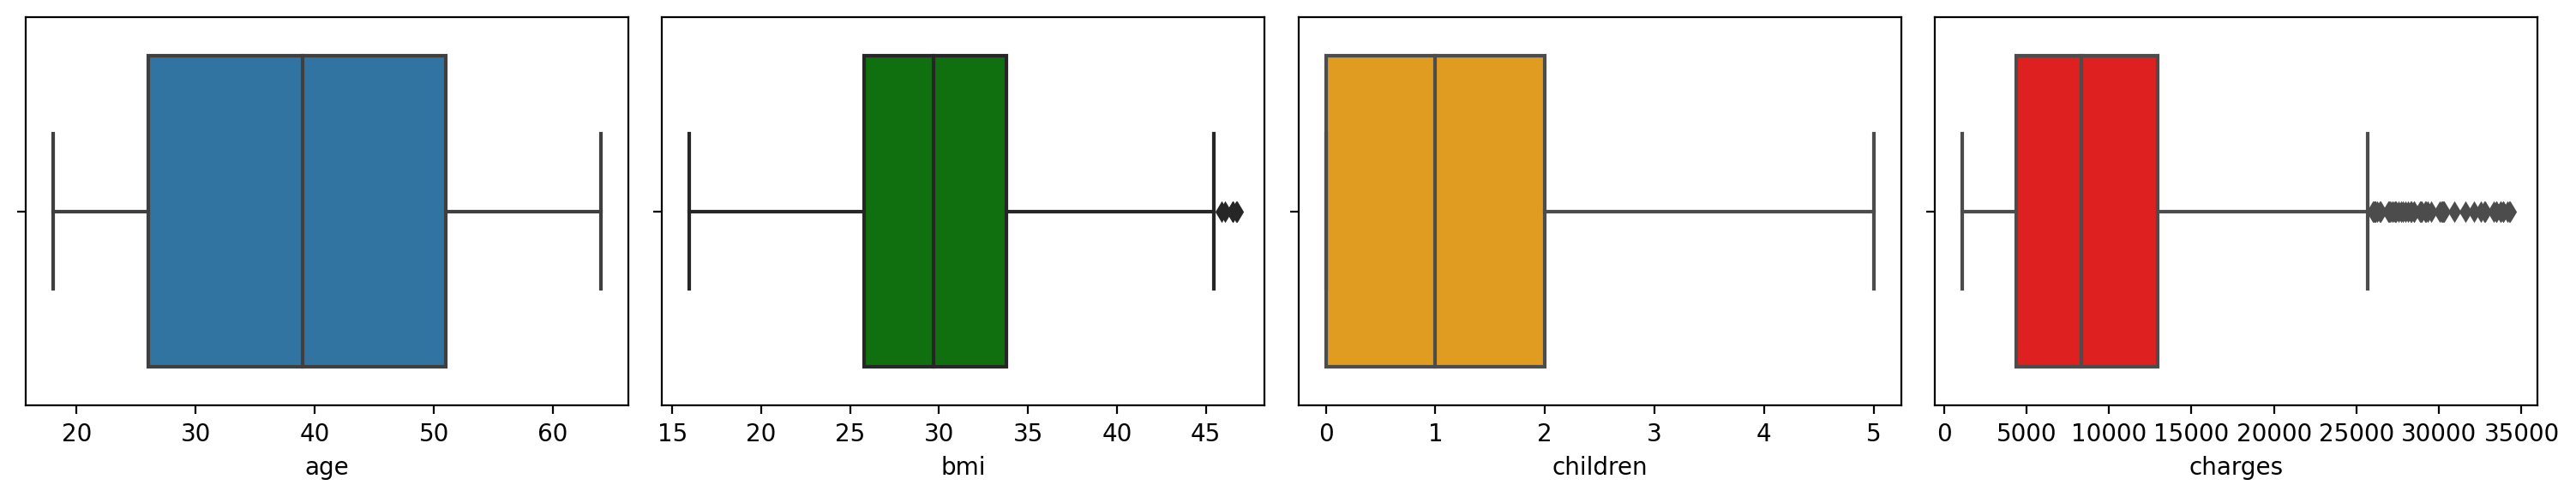

In [61]:
# visualize the continuous data
fig,axe = plt.subplots(1,4, sharey=True)
sns.boxplot(insurance_df['age'],ax =axe[0])
sns.boxplot(insurance_df['bmi'],ax =axe[1],color='green')
sns.boxplot(insurance_df['children'],ax =axe[2],color ='orange')
sns.boxplot(insurance_df['charges'],ax =axe[3],color ='red')
plt.tight_layout()
plt.show()

Most of the outliers have been removed, so lets proceed to data preprocessing

# Data preprocessing

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [64]:
# the dataset contain categorical and numerical variables, lets convert the categorical to numerical values
def convert_cat_num(data):
    for col in data.columns:
        if data[col].dtypes in ['object']:
            data[col] = data[col].astype('category').cat.codes
    return data

In [65]:
df = convert_cat_num(insurance_df)

In [66]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [81]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.021440,0.123827,0.038179,-0.062095,0.006331,0.448798
sex,-0.021440,1.000000,0.016487,0.015564,0.014027,-0.007363,-0.022893
bmi,0.123827,0.016487,1.000000,0.007546,-0.260657,0.152346,-0.064483
children,0.038179,0.015564,0.007546,1.000000,-0.001901,0.024153,0.089083
smoker,-0.062095,0.014027,-0.260657,-0.001901,1.000000,-0.052118,0.596213
region,0.006331,-0.007363,0.152346,0.024153,-0.052118,1.000000,-0.096537
charges,0.448798,-0.022893,-0.064483,0.089083,0.596213,-0.096537,1.000000


In [236]:
# set feature set and target set
X = df[['sex','age','children','smoker']]
Y =df.iloc[:,-1]

The position of various features in the X has an effect of the performance of the models

In [237]:
X.head()

,sex,age,children,smoker
0,0,19,0,1
1,1,18,1,0
2,1,28,3,0
3,1,33,0,0
4,1,32,0,0


In [238]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [239]:
# Standardize the X
scaler = StandardScaler()

X = scaler.fit_transform(X)


In [240]:
# split the dataset
x_train,x_test, y_train,y_test = train_test_split(X,Y, test_size=0.2)

In [241]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((952, 4), (239, 4), (952,), (239,))

In [242]:
# traditional model
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression


In [243]:
def traditional_model(model):
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  score =print('Model score:',(model.score(x_test,y_test))*100)
  mse = print("MSE:",mean_squared_error(y_test,pred))
  mae=print("MAE",mean_absolute_error(y_test,pred))
  rmse = print("RMSE",np.sqrt(mean_squared_error(y_test,pred)))
  return score,mse,mae,rmse

In [244]:
rf = RandomForestRegressor(random_state=42)
traditional_model(rf)


Model score: 53.18908827015729
MSE: 22030078.48295112
MAE 2400.4281508752933
RMSE 4693.621041685313


(None, None, None, None)

In [245]:
xgr = XGBRegressor()
traditional_model(xgr)

Model score: 50.88866329469093
MSE: 23112700.907529034
MAE 2429.01168586248
RMSE 4807.567046597378


(None, None, None, None)

In [246]:
lr = LinearRegression()
traditional_model(lr)

Model score: 64.95931192851904
MSE: 16490794.128651947
MAE 2366.3702374835766
RMSE 4060.8858797868165


(None, None, None, None)

# Build the Neutral Networks

In [77]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [78]:
# build the model
def get_model():
    model =Sequential()
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    return model


In [79]:
model = get_model()

In [80]:
model.compile(optimizer='rmsprop',loss='mse', metrics=['mae'])